In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib

Data Collection & Processing

Dataset Link: [Air Quality Dataset](https://archive.ics.uci.edu/dataset/360/air+quality)

In [3]:
#Loading the data from CSV file to Pandas Dataframe
air_quality_data=pd.read_csv("data/AirQualityUCI.csv")

In [4]:
#Printing the First 5 Rows Of the Dataframe
air_quality_data.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


In [5]:
#As We Can See Our Data is Seperated Using ";" And Inseted of Decimal Point there is ","
air_quality_data=pd.read_csv("data/AirQualityUCI.csv", sep=';', decimal=',')

In [6]:
#Printing the First 5 Rows Of the Dataframe
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [7]:
#Removing Last 2 Null Value Columns from Dataframe
air_quality_data=air_quality_data.iloc[:, :-2]

In [8]:
#Printing the Last 5 Rows from the Dataframe
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Tell The Number Of Rows And Columns In Dataset
air_quality_data.shape

(9471, 15)

In [10]:
#Printing The last Row Of the Dataset Row Number=9357
air_quality_data.loc[[9356]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [11]:
#Taking Only The 9357 rows From Dataframe Since All Rows After that are Null
air_quality_data= air_quality_data.head(9357)
#Checking last Rows For Verification
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [12]:
#Getting Inforamtion About Data (For Checking Null Values)
air_quality_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [13]:
#Checking Missing Values fromm the dataframe
air_quality_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

This shows there are no missing values present in the dataset, but actual missing values are tagged as value "-200"

In [14]:
#Counting the Number of times "-200" has appeared in the dataframe
air_quality_data.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

**Handling Missing Values**

In [15]:
#Converting All the Missing Values from -200 to NaN
air_quality_data=air_quality_data.replace(to_replace=-200,value= np.nan)

In [16]:
#Checking Missing Values fromm the dataframe
air_quality_data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [17]:
air_quality_data.iloc[:, 2:].mean()

CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64

In [18]:
#Replace the Missing value with the mean of the mean value
air_quality_data=air_quality_data.fillna(air_quality_data.iloc[:, 2:].mean())

In [19]:
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [20]:
#Checking Missing Values fromm the dataframe
air_quality_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

**Two Task can be Performed On this Dataset**

1.Forecasting

2.Regression

3.Logistic Regression

**Using Regression To Predict The AQI**

In [21]:
#Preprocessing
features = ['CO(GT)', 'NO2(GT)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
air_quality_data['AQI Value'] = (air_quality_data['NO2(GT)'] + air_quality_data['CO(GT)'] + air_quality_data['PT08.S5(O3)']) / 3
X = air_quality_data[features]
y = air_quality_data['AQI Value']

In [22]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Train models
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
print("Random Forest R2:", r2_score(y_test, rf_model.predict(X_test)))


Random Forest R2: 0.9998298765598522


In [24]:
ab_model = AdaBoostRegressor()
ab_model.fit(X_train, y_train)
print("AdaBoost R2:", r2_score(y_test, ab_model.predict(X_test)))

AdaBoost R2: 0.9913204342039986


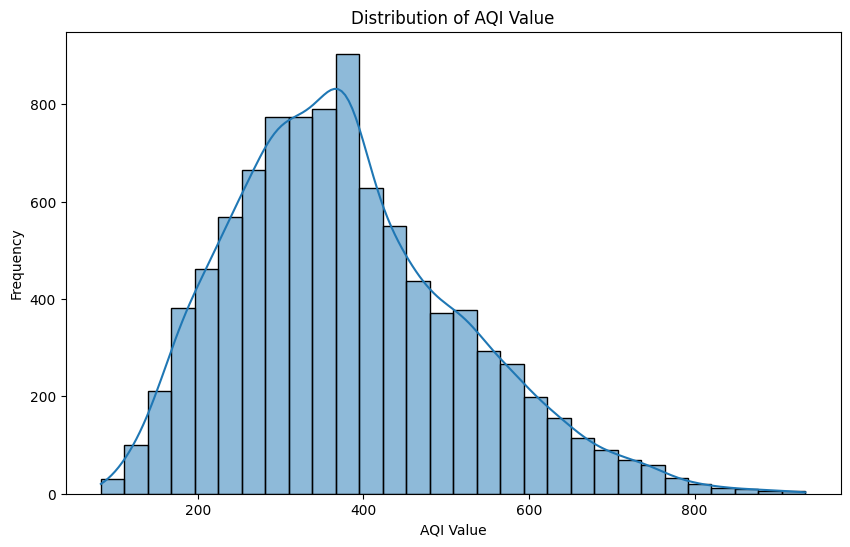

In [25]:
  # Visualize the AQI Value distribution
plt.figure(figsize=(10, 6))
sns.histplot(air_quality_data['AQI Value'], bins=30, kde=True)
plt.title('Distribution of AQI Value')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()

**Logistic Regression**

In [26]:
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

In [27]:
#Creating a New Target Column with AQI Categories
air_quality_data['AQI_Category'] = air_quality_data['AQI Value'].apply(categorize_aqi)

In [28]:
#Encoding Categorical Labels to Numbers
label_encoder = LabelEncoder()
y_cat = label_encoder.fit_transform(air_quality_data['AQI_Category'])

In [29]:
#Splitting the Data into Training and Testing Sets
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [30]:
#Training the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cat, y_train_cat)

C:\Users\dsoul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [31]:
#Evaluating the Model
y_pred_cat = log_reg.predict(X_test_cat)
print("Logistic Regression Accuracy:", accuracy_score(y_test_cat, y_pred_cat))
print("Classification Report:\n", classification_report(y_test_cat, y_pred_cat, target_names=label_encoder.classes_))

Logistic Regression Accuracy: 0.8771367521367521
Classification Report:
                          precision    recall  f1-score   support

              Hazardous       0.94      0.97      0.96      1282
               Moderate       0.00      0.00      0.00         4
              Unhealthy       0.57      0.36      0.44       118
Unhealthy for Sensitive       0.38      0.10      0.15        31
         Very Unhealthy       0.75      0.80      0.78       437

               accuracy                           0.88      1872
              macro avg       0.53      0.45      0.47      1872
           weighted avg       0.86      0.88      0.87      1872



C:\Users\dsoul\AppData\Local\Temp\ipykernel_20736\3101090007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred_cat, palette='viridis')


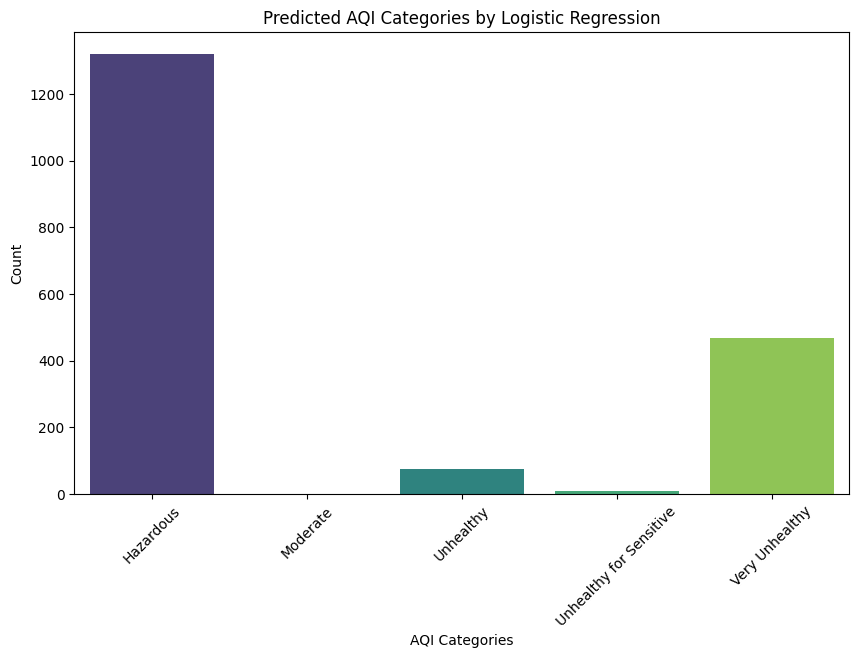

In [32]:
# Visualizing the Logistic Regression results
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred_cat, palette='viridis')
plt.title('Predicted AQI Categories by Logistic Regression')
plt.xlabel('AQI Categories')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.show()

In [33]:
#Save model (we’ll use RF in the frontend)
joblib.dump(rf_model, "aqi_model.pkl")

['aqi_model.pkl']